In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats #for qq plots
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\abc\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('train.csv', usecols = ['Age','Fare','Survived'])

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace = True)

C:\Users\abc\AppData\Local\Temp\ipykernel_10840\1652017284.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace = True)


In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
x = df.iloc[:,1:3]

In [8]:
y = df.iloc[:,0]

In [9]:
x.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [10]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,
                                                random_state =  42)

C:\Users\abc\AppData\Local\Temp\ipykernel_10840\2349798455.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])
C:\Users\abc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


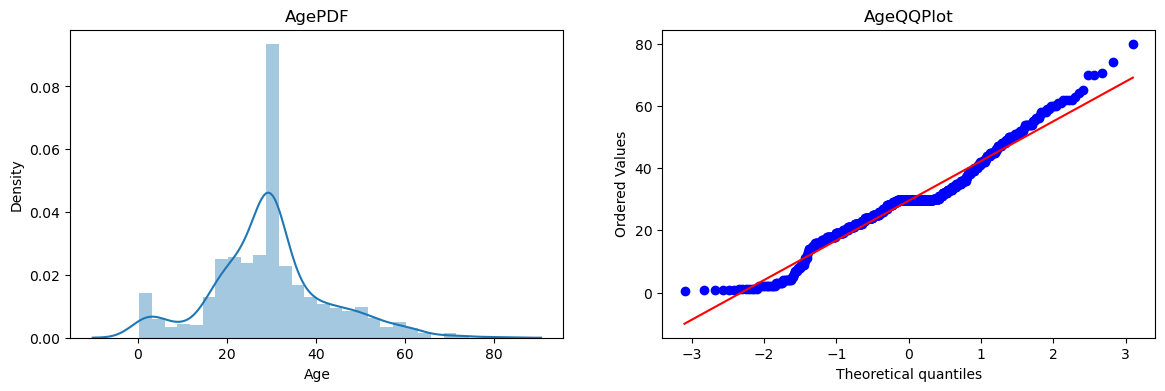

In [20]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('AgePDF')

plt.subplot(122)
stats.probplot(x_train['Age'],dist = 'norm',plot = plt)
plt.title('AgeQQPlot')
plt.show()

C:\Users\abc\AppData\Local\Temp\ipykernel_10840\708512885.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])
C:\Users\abc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


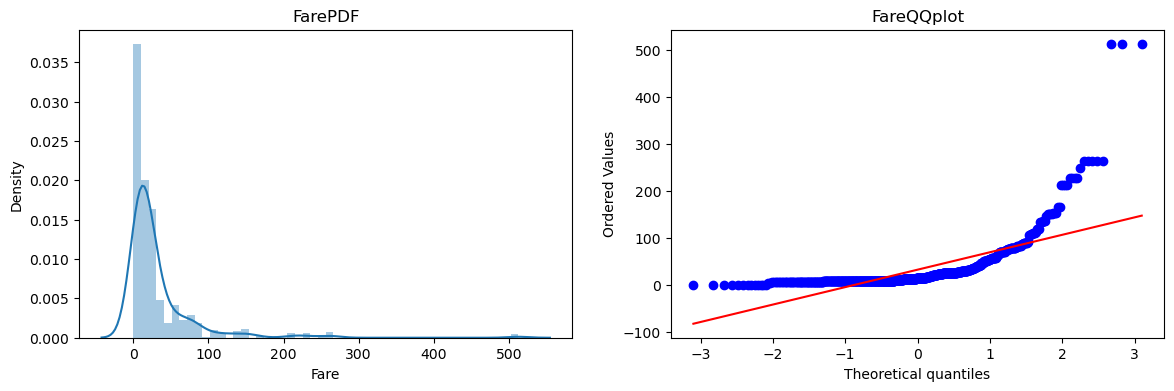

In [24]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('FarePDF')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist = 'norm', plot = plt)
plt.title('FareQQplot')
plt.show()

In [27]:
clf  = LogisticRegression()
cld = DecisionTreeClassifier()

In [28]:
clf.fit(x_train,y_train)
cld.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
y_pred = clf.predict(x_test)

In [30]:
y_pred1 = cld.predict(x_test)

In [38]:
print("accuracy LR", accuracy_score(y_test,y_pred))
print("accuracy DTC", accuracy_score(y_test,y_pred1))

accuracy LR 0.6480446927374302
accuracy DTC 0.6871508379888268


In [32]:
trf = FunctionTransformer(func = np.log1p)

In [33]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [34]:
clf = LogisticRegression()

In [35]:
cld = DecisionTreeClassifier()

In [37]:
clf.fit(x_train_transformed,y_train)
cld.fit(x_train_transformed,y_train)

DecisionTreeClassifier()

In [39]:
y_pred = clf.predict(x_test_transformed)
y_pred1 = cld.predict(x_test_transformed)

In [43]:
accuracy_score(y_test,y_pred)

0.6815642458100558

In [42]:
accuracy_score(y_test,y_pred1)

0.6927374301675978

In [48]:
x_transformed = trf.fit_transform(x)

In [49]:
clf = LogisticRegression()
cld = DecisionTreeClassifier()


In [51]:
print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring = 'accuracy',cv = 10)))

LR 0.678027465667915


In [52]:
print("DT",np.mean(cross_val_score(cld,x_transformed,y,scoring = 'accuracy',cv = 10)))

DT 0.6599875156054932


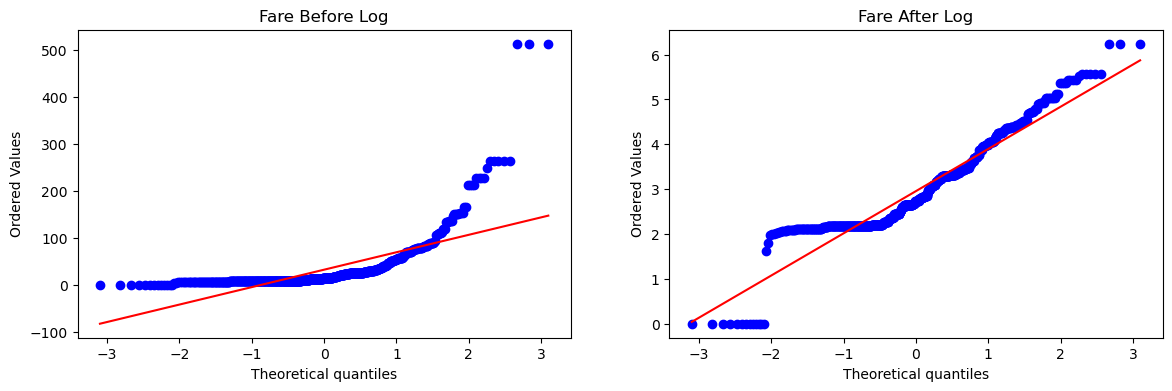

In [53]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

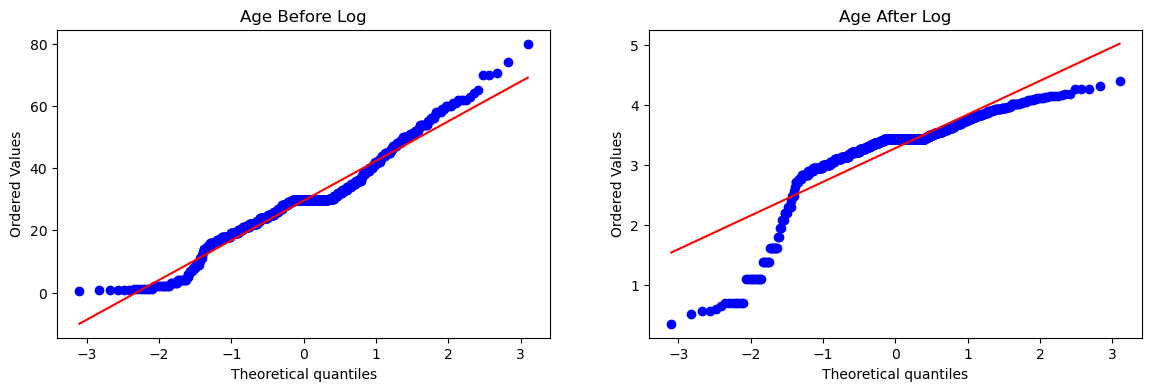

In [54]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()


In [55]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(x_train)
X_test_transformed2 = trf2.transform(x_test)

In [56]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6703910614525139


In [58]:
X_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6677902621722847


In [59]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6442446941323345


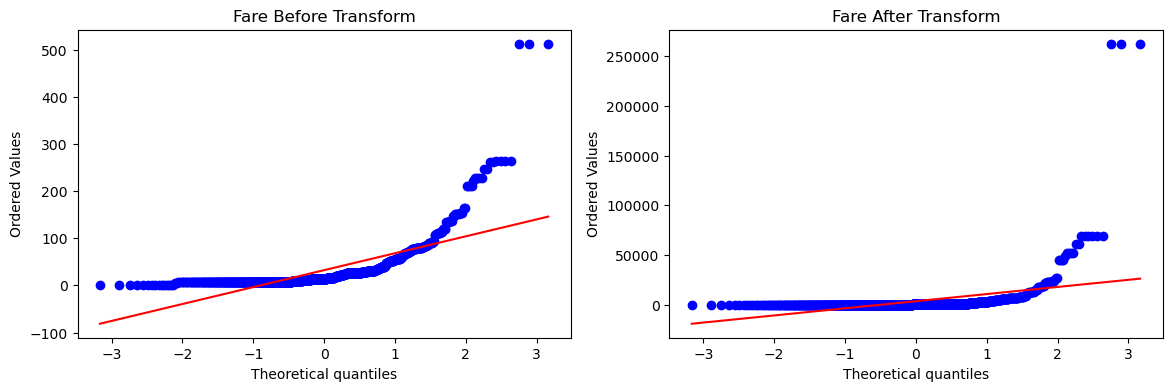

In [63]:
apply_transform(np.square)